## Mini-Project 2 - Exploring radiation and wavelength 

A radiating body - such as our Sun - emits energy across the electromagnetic spectrum. The relationship between emissions and wavelength is given by

![](http://narock.github.io/teaching/CST-411/planck_equation.png)

where

h = Planck's constant = 6.626 × 10<sup>-34</sup> m<sup>2</sup> kg / s

k = Boltzmann's constant = 1.38 × 10<sup>-23</sup> m<sup>2</sup> kg s<sup>-2</sup> K<sup>-1</sup>

c = speed of light = 299792458 m / s

and T = Temperature of the radiating body in Kelvin

B is expressed in W*m<sup>-2</sup>*nm<sup>-1</sup>*ster<sup>-1</sup>. In other words, Watts per square meter per nanometer per steradian. Essentially, B is telling us how much power (Watts) are released over an area for a given wavelength.

Let's use the Sun as our radiating body. The temperature of the Sun in is 5780 Kelvin and we can write B in Python as: 

In [257]:
import numpy as np

# define our constants
h = 6.626e-34 # Planck's constant
k = 1.38e-23  # Boltzmann's constant
c = 299792458 # speed of light
T = 5780 # Sun's temperature in Kelvin

# this equation was first proposed by Planck so let's name
# our function planck
def planck(wavelength):  
    
    numerator = 2.*h*(c)**2/wavelength**5
    denominator = np.exp(h*c/(k*T*wavelength))-1.
    # dividing to get the units to work out to be nm
    b = (numerator / denominator) / 10**9 
    
    return b

How much power does the Sun output at 570nm (yellow light)?

In [275]:
wavelength = 570 * 1e-9 # multiple by 1e-9 to convert to nanometers
b = planck(wavelength)
print( np.round(b,2), 'W m-2 nm-1 ster-1' )

3593.3 W m-2 nm-1 ster-1


How much power does the Sun output at 450 nm (blue light)?

In [276]:
wavelength = 450 * 1e-9 # multiple by 1e-9 to convert to nanometers
b = planck(wavelength)
print( np.round(b,2), 'W m-2 nm-1 ster-1' )

2172.73 W m-2 nm-1 ster-1


Let's see what B looks like across the entire electromagnetic spectrum for our Sun.

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp


Text(0.5,1,'Electromagnetic emissions from our Sun as a function of wavelength')

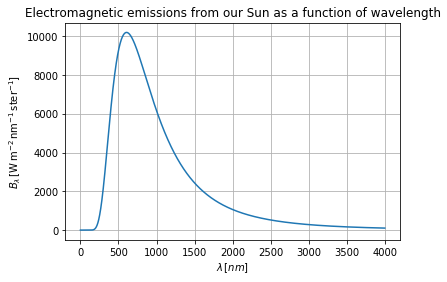

In [248]:
import matplotlib.pyplot as plt

# creating a list of wavelengths that we can pass into planck()
wavelengths = np.arange(0.1,4000,1) # wavelengths in meters

# defining an empty list to out the results of planck(wavelength)
b_list = []

# loop over our list passing the wavelengths to planck() one at a time
for wavelength in wavelengths:
    w = wavelength * 1e-9 # convert to nanometers
    b = planck(w)
    b_list.append(b)
plt.grid()
plt.plot(wavelengths, b_list)
plt.xlabel(r'$\lambda \, [nm]$')
plt.ylabel(r'$B_{\lambda} \, [\mathrm{W \, m^{-2} \, nm^{-1} \, ster^{-1}}]$')
plt.title('Electromagnetic emissions from our Sun as a function of wavelength')

1.) The above visualization shows us how the Sun emits across the electromagnetic spectrum. We can see that the bulk of the Sun's emissions occur between roughly 400 and 900 nanometers and decrease sharply before and after that. Where exactly is the peak of the emission? At what wavelength does the Sun emit the most? Find where the maximum of B occurs and use this to find the corresponding wavelength.

In [230]:
m = max(b_list)
i = b_list.index(m)
print("Our Sun has emissions at many wavelengths")
print("However, the Sun has its strongest at", wavelengths[i], 'nanometers')

Our Sun has emissions at many wavelengths
However, the Sun has its strongest at 501.1 nanometers


The visible portion of the electromagnetic spectrum is between 400 and 700nm. Let's highlight this in our visualization. The matplotlib function fill_between() will color in a specified area of our plot. An example is given here.

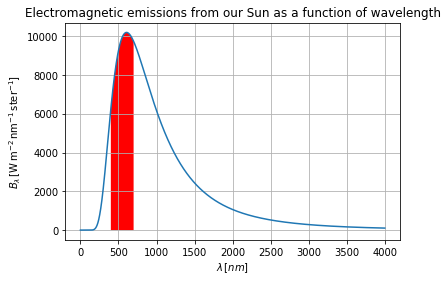

In [243]:
# create the plot as we normally would
plt.grid()
plt.plot(wavelengths, b_list)
plt.xlabel(r'$\lambda \, [nm]$')
plt.ylabel(r'$B_{\lambda} \, [\mathrm{W \, m^{-2} \, nm^{-1} \, ster^{-1}}]$')
plt.title('Electromagnetic emissions from our Sun as a function of wavelength')

# all of the x-values we want colored in
# to specify the visible portion, we'll define a list ranging from 400 to 700
x_colors = np.arange(400,700,1) # wavelengths in meters

# this list will hold the y-values we want colored in
y_colors = []

# loop over the x values one at a time and compute the corresponding y-value
for x in x_colors:
    w = x * 1e-9 # convert to nanometers
    b = planck(w)
    y_colors.append(b)
    
# use our two lists to specify the x and y values to color
plt.fill_between(x_colors, y_colors, facecolor='red')

2.) Of all the emissions coming from the Sun, what fraction are in this visible portion of the spectrum (400nm to 700nm)? Let's answer this question step by step.

2a.) First, let's find the total power emitted in the visible portion of the spectrum. This is equal to the area under the curve from 400nm to 700nm. We can find this by integrating B from 400 to 700, i.e. integrating over the red shaded area in the plot above. Perform that integration here.

<b>Keep in mind that the input to plank() is wavelength in meters.</b>

In [233]:
import scipy.integrate 

visible = scipy.integrate.quad(planck, 400.*1e-9, 700.*1e-9)
print(visible)

(0.007372205393527506, 8.184792170160001e-17)


2b.) Now, let's find the total power emitted over all wavelengths. To find this value, we integrate B from 0 to Infinity. However, Python runs into errors trying to integrate this particular equation to infinity. Let's approximate the solution by integrating from 0 to one hundred thousand nanometers. 

In [234]:
all = scipy.integrate.quad(planck, 0., 100000.*1e-9)
print(all)

(0.02010804669473905, 2.2803465142001674e-11)


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp


2c.) Dividing our result from 3a. by our result from 3b. will give us the fraction of the emissions in the visible portion of the spectrum. What is that fraction?

In [235]:
r1 = np.round(visible[0]/all[0],2)
print("The fraction of emissions in the visible portion of the spectrum is", r1)

The fraction of emissions in the visible portion of the spectrum is 0.37


3.) The ultraviolet portion of the spectrum ranges from 10nm to 400nm. The infrared porition of the spectrum ranges from 700nm to 10<sup>5</sup>nm. It's said that infrared, visible, and ultraviolet emissions account for 99% of the Sun's total emissions. Prove this.

<b>Due to rounding errors and approximations your answer may not be exactly .99. That's ok and to be expected. However, if you get an answer that differs from 0.99 by more than 0.02 then you should double check your math</b>

In [236]:
ultraviolet = scipy.integrate.quad(planck, 10.*1e-9, 400.*1e-9)
infrared = scipy.integrate.quad(planck, 700.*1e-9, 1e5*1e-9)

In [237]:
r2 = np.round(ultraviolet[0]/all[0],2)
r3 = np.round(infrared[0]/all[0],2)
print("Fraction of emissions in the ultraviolet portion of the spectrum is", r2)
print("Fraction of emissions in the infrared portion of the spectrum is", r3)

Fraction of emissions in the ultraviolet portion of the spectrum is 0.12
Fraction of emissions in the infrared portion of the spectrum is 0.51


In [238]:
total = r1+r2+r3
print("Infrared plus visible plus ultraviolet =", total)

Infrared plus visible plus ultraviolet = 1.0


4.) We proved this numerically. Now let's show it visually. Use the fill_between() example above to color in the infrared portion of the spectrum in red, the visible portion in green, and the ultraviolet portion in purple. (all on the same plot)

(0, 4000)

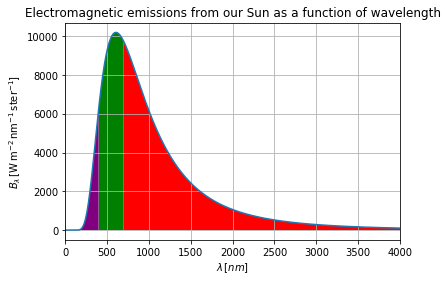

In [246]:
# create the plot as we normally would
plt.grid()
plt.plot(wavelengths, b_list)
plt.xlabel(r'$\lambda \, [nm]$')
plt.ylabel(r'$B_{\lambda} \, [\mathrm{W \, m^{-2} \, nm^{-1} \, ster^{-1}}]$')
plt.title('Electromagnetic emissions from our Sun as a function of wavelength')

# all of the x-values we want colored in
i_colors_x = np.arange(700,1e5,1) # wavelengths in meters
v_colors_x = np.arange(400,700,1) # wavelengths in meters
u_colors_x = np.arange(10,400,1) # wavelengths in meters

# this list will hold the y-values we want colored in
i_colors_y = []
v_colors_y = []
u_colors_y = []

# loop over the x values one at a time and compute the corresponding y-value
for i in i_colors_x:
    w = i * 1e-9 # convert to nanometers
    b = planck(w)
    i_colors_y.append(b)
    
for v in v_colors_x:
    w = v * 1e-9 # convert to nanometers
    b = planck(w)
    v_colors_y.append(b)
    
for u in u_colors_x:
    w = u * 1e-9 # convert to nanometers
    b = planck(w)
    u_colors_y.append(b)
    
# use our two lists to specify the x and y values to color
plt.fill_between(i_colors_x, i_colors_y, facecolor='red')
plt.fill_between(v_colors_x, v_colors_y, facecolor='green')
plt.fill_between(u_colors_x, u_colors_y, facecolor='purple')
plt.xlim(0,4000)

5.) Let's look at what would happen if the Sun were a bit cooler. What would the above plot look like if the Sun's temperature were 4000K? Plot the 4000K curve on top of the 5780K curve. Use a legend to show which curve belongs to which temperature.

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp


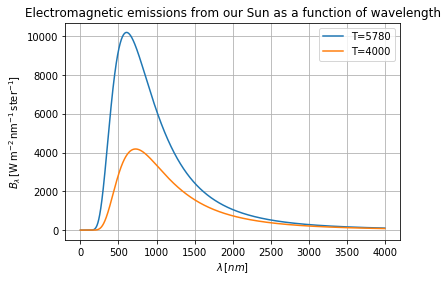

In [262]:
T = 4000
b_list2 = []
for wavelength in wavelengths:
    w = wavelength * 1e-9 # convert to nanometers
    b = planck(w)
    b_list2.append(b)
plt.grid()
plt.plot(wavelengths, b_list)
plt.plot(wavelengths, b_list2)
plt.xlabel(r'$\lambda \, [nm]$')
plt.ylabel(r'$B_{\lambda} \, [\mathrm{W \, m^{-2} \, nm^{-1} \, ster^{-1}}]$')
plt.title('Electromagnetic emissions from our Sun as a function of wavelength')
plt.legend(['T=5780','T=4000'])

6.) Where is the peak of the emissions when T=4000?

In [263]:
m = max(b_list2)
i = b_list2.index(m)
w = np.round( wavelengths[i], 2 )
print("Our Sun's strongest emissions are at 502 nm")
print("If the Sun's temperature were 4780K the peak would be at", w, 'nm')

Our Sun's strongest emissions are at 502 nm
If the Sun's temperature were 4780K the peak would be at 725.1 nm


7.) What would the percentage of emissions in the visible portion be now with the temperature at 4000K?

In [264]:
visible = scipy.integrate.quad(planck, 400.*1e-9, 700.*1e-9)
all = scipy.integrate.quad(planck, 0., 100000.*1e-9)
print(visible[0]/all[0])

0.20793734582536422


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp


At 5780K we have 37% of the total emissions in the visible portion of the spectrum. At 4000k it drops to 21%.